In [8]:
# Install necessary packages
!pip install diffusers transformers accelerate

In [9]:
# Import necessary libraries
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

In [34]:
# Load the dreamlike diffusion model from HuggingFace
model = "dreamlike-art/dreamlike-diffusion-1.0"
pipe = StableDiffusionPipeline.from_pretrained(model, torch_dtype = torch.float16, use_safetensors = True)

# Transfer the pipe to GPU
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [35]:
# Function to generate images
def generate_image(pipe, prompt, num_images, width, height, params):
  if params == None:
    params = {}

  # Set width and height in params
  params["width"] = width
  params["height"] = height

  # Generate the image using the prompt and parameters
  result = pipe(prompt, num_images_per_prompt = num_images, **params)
  images = result.images

  # Plot the generated images
  fig, ax = plt.subplots(1, num_images, figsize = (15,5))
  if num_images == 1:
    ax.imshow(images[0])
    ax.axis('off')
  else:
    for i in range(num_images):
      ax[i].imshow(images[i])
      ax[i].axis('off')

  plt.tight_layout()
  plt.show()

In [36]:
# Get information from the user
prompt = input("Enter your prompt: ")
num_images = int(input("Enter the number of images you want to generate (maximum of 3): "))
num_images = min(num_images, 3)
width = int(input("Enter the image width (must be divisible by 8): "))
height = int(input("Enter the image height (must be divisible by 8): "))

# Convert width and height automatically to be divisible by 8
width = width - (width % 8)
height = height - (height % 8)

Enter your prompt: cat and dog in a single body
Enter the number of images you want to generate (maximum of 3): 2
Enter the image width (must be divisible by 8): 1000
Enter the image height (must be divisible by 8): 500


  0%|          | 0/50 [00:00<?, ?it/s]

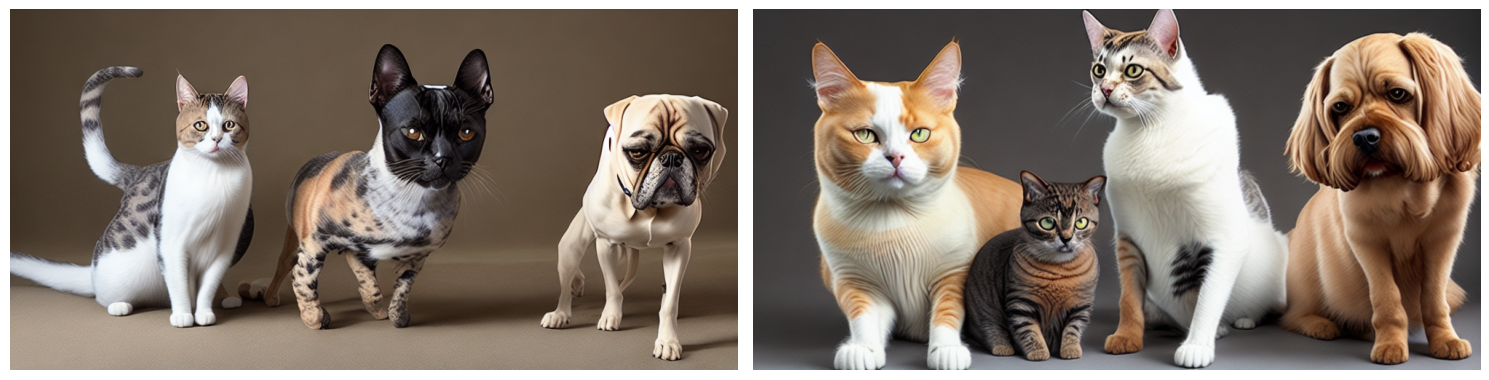

In [37]:
# Generate the images based on the input
params = {'num_inference_steps': 50}
generate_image(pipe, prompt, num_images, width, height, params)